Here we implement SLP with Tensorflow to help understand how to develop neural networks. 

SLP is an algorithm for supervised learning of binary classifiers. It is a type of linear classifier, i.e. a classification algorithm that makes its perdictions based on a lineary predictor function bombining a set of weights with a feature vector.

The perceptron is an algorithm for learning a binary classifier, called a threshold function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
import random
from array import *
import torch
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

### We first setup the definition of the neural network. 

In [2]:
#let's create some data first. This running example will be divded into 2 inputs, called inputX and inputY. 
#We will use the following convention, the point [3.,1.] assigned to [1.0,0.0] will mean that the point (3,1) will belong to 
#inputX. Swapping [0.0,1.0] would mean that it belongs to inputY. 

inputX_array = []
number_of_points = 150
random_number_left = 1
random_number_right = 15

for i in range(0,2*number_of_points):
    inputX_new1 = random.randint(random_number_left,random_number_right)
    inputX_array.append(inputX_new1)

inputX = torch.tensor(inputX_array).reshape([number_of_points,2]) 
inputY = [[1.,0.]]*100+[[0.,1.]]*50

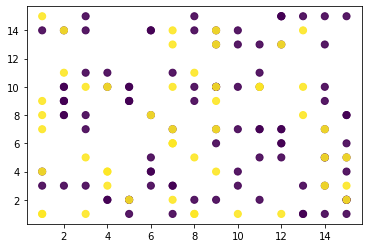

In [3]:
yc = [0]*100+[1]*50
plt.scatter(inputX[:,0],inputX[:,1], c=yc, s=50, alpha=0.9)
plt.show()

In [17]:
#Set parameters needed for Single Layor Preceptron
learning_rate = 0.001
training_epochs = 10000
display_step =50
n_samples = number_of_points
batch_size = 10
total_batch = int(n_samples/batch_size)
n_input = 2 #size data input (# size of each element of x)
n_classes = 2 # n of classes

In [18]:
tf.compat.v1.disable_eager_execution() #disable the default activate eager execution (version issue with tensorflow)
x = tf.compat.v1.placeholder("float", [None, n_input])
y = tf.compat.v1.placeholder("float", [None, n_classes])

In [19]:
#let's set model weights and biases
W = tf.Variable(tf.zeros([n_input, n_classes]))
b = tf.Variable(tf.zeros([n_classes]))

In [20]:
#Use these variables to define the so-called "evidence function", which characterizes the neural network in mathematical form. 

evidence = tf.add(tf.matmul(x,W),b)

In [21]:
# The softmax function performs two steps:
# 1. It calculates the evidence that a certain Cartesian entry point xi belongs to a particular class
# 2. It converts the evidence into probability of belonging to each of the two possible classes and returns as y_

y_ = tf.nn.softmax(evidence)

In [22]:
# Choose your loss function to minimize. Here, MSE is used

cost = tf.reduce_sum(tf.pow(y-y_,2))/ (2*n_samples)

# We will optimize the cost function using the gradient descent method

optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)

### We now enter the learning phase

In [23]:
#create containers for the results we will obtain for this phase. 

avg_set = []
epoch_set = []

#initialize all the variables and start the session
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(training_epochs):
        sess.run(optimizer, feed_dict = {x: inputX, y:inputY})
        if i % display_step == 0:
            c = sess.run(cost, feed_dict = {x: inputX, y: inputY})
            print("Epoch:", '%04d' % i, "cost =", "{:.9f}".format(c))
            avg_set.append(c)
            epoch_set.append(i+1)
    print("Training phase finished")
    
    #summary
    training_cost = sess.run(cost, feed_dict = {x: inputX, y: inputY})
    print("Training cost =", training_cost, "\n W=", sess.run(W), "\n b=", sess.run(b))
    last_result = sess.run(y_, feed_dict = {x:inputX})
    print("Last result =", last_result)

Epoch: 0000 cost = 0.247721106
Epoch: 0050 cost = 0.218532562
Epoch: 0100 cost = 0.217349738
Epoch: 0150 cost = 0.217254549
Epoch: 0200 cost = 0.217239082
Epoch: 0250 cost = 0.217232570
Epoch: 0300 cost = 0.217228442
Epoch: 0350 cost = 0.217225552
Epoch: 0400 cost = 0.217223540
Epoch: 0450 cost = 0.217222095
Epoch: 0500 cost = 0.217220977
Epoch: 0550 cost = 0.217220187
Epoch: 0600 cost = 0.217219517
Epoch: 0650 cost = 0.217218995
Epoch: 0700 cost = 0.217218533
Epoch: 0750 cost = 0.217218131
Epoch: 0800 cost = 0.217217743
Epoch: 0850 cost = 0.217217416
Epoch: 0900 cost = 0.217217058
Epoch: 0950 cost = 0.217216745
Epoch: 1000 cost = 0.217216447
Epoch: 1050 cost = 0.217216164
Epoch: 1100 cost = 0.217215836
Epoch: 1150 cost = 0.217215553
Epoch: 1200 cost = 0.217215270
Epoch: 1250 cost = 0.217215016
Epoch: 1300 cost = 0.217214689
Epoch: 1350 cost = 0.217214406
Epoch: 1400 cost = 0.217214137
Epoch: 1450 cost = 0.217213854
Epoch: 1500 cost = 0.217213571
Epoch: 1550 cost = 0.217213288
Epoch: 1

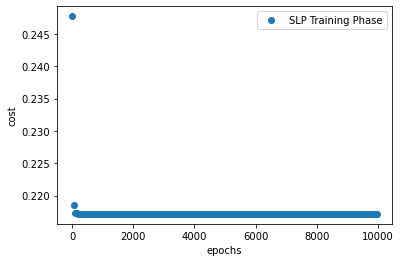

In [24]:
#Let's now visualize the error

plt.plot(epoch_set, avg_set, 'o', label='SLP Training Phase')
plt.ylabel('cost')
plt.xlabel('epochs')
plt.legend()
plt.show()

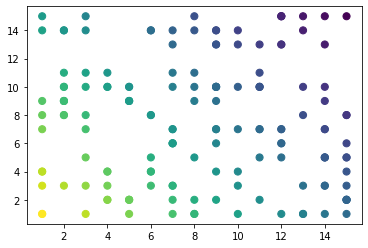

In [25]:
#view the results. Purple means it belongs to the first tgroup and yellow means it belongs to the second group. Uncertainty is green
yc = last_result[:,1]
#The idea is that the values of yc are between 0 and 1, which give the color to help visually detect matches
plt.scatter(inputX[:,0],inputX[:,1], c=yc, s=50,alpha=1)
plt.show()

In [26]:
yc

array([0.3500352 , 0.29055688, 0.3284025 , 0.2854864 , 0.27867305,
       0.30035672, 0.3951261 , 0.30178234, 0.42717752, 0.38976893,
       0.37703797, 0.26012287, 0.20871706, 0.37756857, 0.2970692 ,
       0.36238474, 0.29055688, 0.27867305, 0.21813606, 0.34952158,
       0.36447453, 0.24197817, 0.29055688, 0.27731323, 0.27507877,
       0.38497278, 0.34596202, 0.26973048, 0.3060578 , 0.2970692 ,
       0.30035672, 0.25539228, 0.22160259, 0.31712475, 0.33438146,
       0.38497278, 0.4178663 , 0.3999665 , 0.26359278, 0.24570453,
       0.2278577 , 0.24570453, 0.26665038, 0.3089187 , 0.28594726,
       0.38179666, 0.35054913, 0.44982988, 0.35464707, 0.32250357,
       0.40319517, 0.26620904, 0.39404714, 0.36290672, 0.29754093,
       0.35464707, 0.24156415, 0.35464707, 0.46375275, 0.2737299 ,
       0.3215175 , 0.39404714, 0.32250357, 0.39404714, 0.24904679,
       0.38179666, 0.3587664 , 0.27417907, 0.19960098, 0.4178663 ,
       0.29754093, 0.3368738 , 0.3860427 , 0.45427656, 0.34647

In [27]:
inputX

tensor([[ 4, 11],
        [15,  2],
        [ 3, 15],
        [10, 10],
        [14,  5],
        [ 6, 14],
        [ 6,  3],
        [12,  5],
        [ 5,  1],
        [ 3,  8],
        [ 6,  5],
        [15,  6],
        [14, 15],
        [ 8,  2],
        [ 9, 10],
        [ 1, 14],
        [15,  2],
        [14,  5],
        [13, 15],
        [ 2, 14],
        [ 9,  2],
        [14, 10],
        [15,  2],
        [ 8, 14],
        [15,  4],
        [ 2, 10],
        [ 5, 10],
        [ 8, 15],
        [13,  3],
        [ 9, 10],
        [ 6, 14],
        [10, 14],
        [14, 13],
        [ 8,  9],
        [10,  4],
        [ 2, 10],
        [ 5,  2],
        [ 7,  1],
        [14,  7],
        [15,  8],
        [12, 15],
        [15,  8],
        [11, 11],
        [ 8, 10],
        [12,  7],
        [ 7,  3],
        [ 6,  8],
        [ 2,  3],
        [ 5,  9],
        [13,  1],
        [ 2,  8],
        [ 9, 14],
        [ 2,  9],
        [ 3, 11],
        [11,  7],
        [ 

### Test phase and accuracy calculation

In [30]:
# Set the testing set and repeat the previous setup

inputX_test_array = []

for i in range(0,2*number_of_points):
    inputX_test_new1 = random.randint(random_number_left,random_number_right)
    inputX_test_array.append(inputX_test_new1)

inputX_test = torch.tensor(inputX_test_array).reshape([number_of_points,2]) 
inputY_test = [[1.,0.]]*100 + [[0.,1.]]*50

In [31]:
#Now use the testing set to evaluate the SLP neural network and calculate the accurracy

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(training_epochs):
        sess.run(optimizer, feed_dict = {x: inputX, y:inputY})
    
    pred = tf.nn.softmax(evidence)
    result = sess.run(pred, feed_dict = {x: inputX_test})
    correct_prediction = tf. equal(tf.argmax(pred,1),tf.argmax(inputY_test,1))
    
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy =", accuracy.eval({x:inputX_test, y:inputY_test}))

Accuracy = 0.6666667
